# Якиманский А В

## Задача: Классификация Fashion MNIST с точностью не менее 88%

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Проверка доступности CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

Используется устройство: cuda


## 1. Загрузка и подготовка данных Fashion MNIST

100.0%
100.0%
100.0%
100.0%

платье сумка рубашка сумка сандалии сандалии сандалии пальто


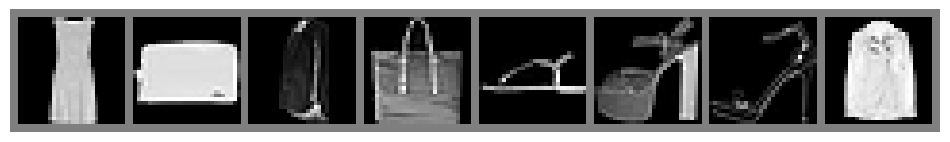

In [4]:
# Определение преобразований данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка тренировочного и тестового набора данных
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                          download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                         download=True, transform=transform)

# Создание загрузчиков данных
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Классы в Fashion MNIST
classes = ['футболка/топ', 'брюки', 'свитер', 'платье', 'пальто',
           'сандалии', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

# Визуализация нескольких примеров из датасета
def imshow(img):
    img = img / 2 + 0.5  # денормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Получение случайных изображений из тренировочного набора
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Отображение изображений
plt.figure(figsize=(12, 4))
imshow(torchvision.utils.make_grid(images[:8]))
# Вывод меток
print(' '.join(f'{classes[labels[j]]}' for j in range(8)))

## 2. Определение архитектуры нейронной сети

In [5]:
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        
        # Входной размер изображения Fashion MNIST: 28x28 = 784 пикселя
        self.flatten = nn.Flatten()
        
        # Полносвязные слои
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(128, 10)  # 10 классов в Fashion MNIST
    
    def forward(self, x):
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.relu3(x)
        
        x = self.fc4(x)
        return x

# Создание экземпляра модели и перемещение его на устройство
model = FashionMNISTNet().to(device)
print(model)

FashionMNISTNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


## 3. Настройка функции потерь и оптимизатора

In [6]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

## 4. Обучение модели

In [7]:
def train_model(model, trainloader, criterion, optimizer, epochs=10):
    train_losses = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        model.train()
        
        for i, (inputs, labels) in enumerate(trainloader):
            # Перемещение данных на устройство
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Обнуление градиентов
            optimizer.zero_grad()
            
            # Прямой проход
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Обратное распространение и оптимизация
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Печать статистики
            if i % 100 == 99:
                print(f'Эпоха {epoch+1}, Батч {i+1}, Потеря: {running_loss/100:.4f}')
                train_losses.append(running_loss/100)
                running_loss = 0.0
    
    print('Обучение завершено!')
    return train_losses

# Обучение модели
train_losses = train_model(model, trainloader, criterion, optimizer, epochs=10)

Эпоха 1, Батч 100, Потеря: 0.9194
Эпоха 1, Батч 200, Потеря: 0.5890
Эпоха 1, Батч 300, Потеря: 0.5429
Эпоха 1, Батч 400, Потеря: 0.5026
Эпоха 1, Батч 500, Потеря: 0.4931
Эпоха 1, Батч 600, Потеря: 0.4667
Эпоха 1, Батч 700, Потеря: 0.4619
Эпоха 1, Батч 800, Потеря: 0.4266
Эпоха 1, Батч 900, Потеря: 0.4516
Эпоха 2, Батч 100, Потеря: 0.4242
Эпоха 2, Батч 200, Потеря: 0.4175
Эпоха 2, Батч 300, Потеря: 0.4237
Эпоха 2, Батч 400, Потеря: 0.3997
Эпоха 2, Батч 500, Потеря: 0.4049
Эпоха 2, Батч 600, Потеря: 0.3821
Эпоха 2, Батч 700, Потеря: 0.4067
Эпоха 2, Батч 800, Потеря: 0.4046
Эпоха 2, Батч 900, Потеря: 0.3903
Эпоха 3, Батч 100, Потеря: 0.3747
Эпоха 3, Батч 200, Потеря: 0.3820
Эпоха 3, Батч 300, Потеря: 0.3828
Эпоха 3, Батч 400, Потеря: 0.3664
Эпоха 3, Батч 500, Потеря: 0.3593
Эпоха 3, Батч 600, Потеря: 0.3782
Эпоха 3, Батч 700, Потеря: 0.3586
Эпоха 3, Батч 800, Потеря: 0.3787
Эпоха 3, Батч 900, Потеря: 0.3577
Эпоха 4, Батч 100, Потеря: 0.3628
Эпоха 4, Батч 200, Потеря: 0.3480
Эпоха 4, Батч 

## 5. Оценка модели на тестовой выборке

In [8]:
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    model.eval()
    
    # Отключение вычисления градиентов для ускорения вычислений
    with torch.no_grad():
        for inputs, labels in testloader:
            # Перемещение данных на устройство
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Прямой проход
            outputs = model(inputs)
            
            # Получение предсказанных классов
            _, predicted = torch.max(outputs.data, 1)
            
            # Обновление счетчиков
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Точность на тестовой выборке: {accuracy:.2f}%')
    return accuracy

# Оценка модели
test_accuracy = evaluate_model(model, testloader)

Точность на тестовой выборке: 87.54%


## 6. Визуализация результатов

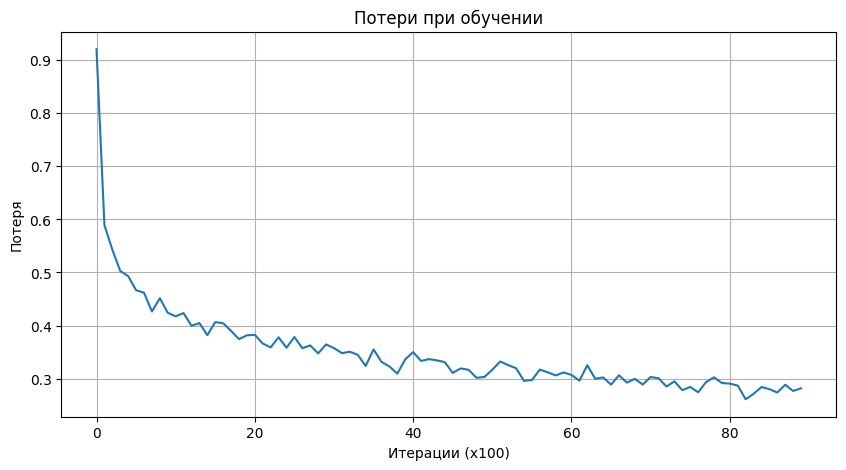

In [9]:
# Отображение графика потерь при обучении
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Потери при обучении')
plt.xlabel('Итерации (x100)')
plt.ylabel('Потеря')
plt.grid(True)
plt.show()

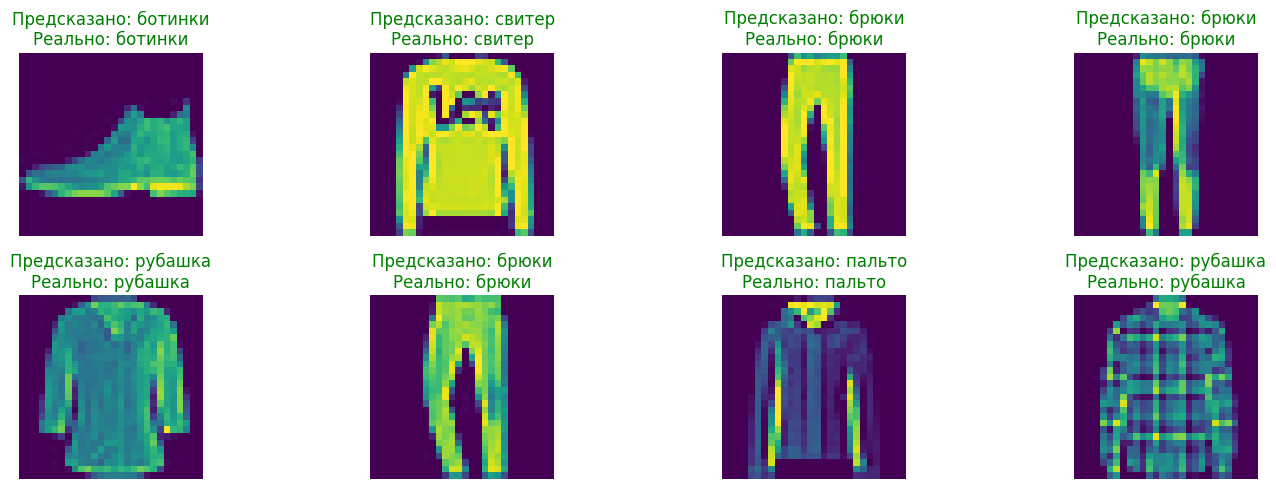

In [10]:
# Визуализация предсказаний на нескольких тестовых примерах
dataiter = iter(testloader)
images, labels = next(dataiter)

# Получение предсказаний
model.eval()
with torch.no_grad():
    images_device = images.to(device)
    outputs = model(images_device)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu()

# Отображение нескольких тестовых изображений с их предсказанными и истинными метками
fig = plt.figure(figsize=(15, 5))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    imshow(images[i])
    color = 'green' if predicted[i] == labels[i] else 'red'
    ax.set_title(f'Предсказано: {classes[predicted[i]]}\nРеально: {classes[labels[i]]}', color=color)
plt.tight_layout()
plt.show()

## 7. Матрица ошибок

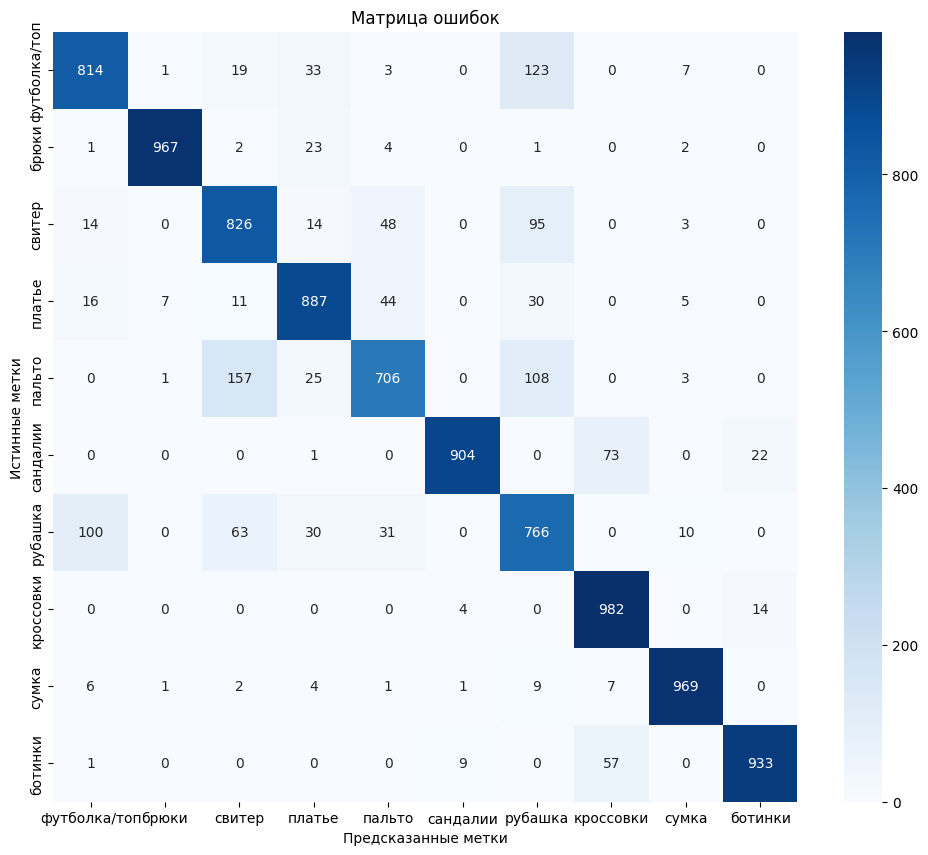

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получение предсказаний для всего тестового набора
all_predictions = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Создание и отображение матрицы ошибок
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

## 8. Экспериментирование с другими архитектурами (опционально)

Если вышеописанная модель не достигла требуемой точности 88%, можно попробовать улучшить архитектуру сети:

In [14]:
class ImprovedFashionMNISTNet(nn.Module):
    def __init__(self):
        super(ImprovedFashionMNISTNet, self).__init__()
        
        self.flatten = nn.Flatten()
        
        # Увеличенное количество нейронов и слоев
        self.fc1 = nn.Linear(784, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)
        
        self.fc4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        
        x = self.fc5(x)
        return x


improved_model = ImprovedFashionMNISTNet().to(device)
print(improved_model)
# 
# Определение нового оптимизатора с расписанием обучения
improved_optimizer = optim.Adam(improved_model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(improved_optimizer, 'min', patience=2, factor=0.5)
# 
# # Обучение улучшенной модели с большим количеством эпох
improved_train_losses = train_model(improved_model, trainloader, criterion, improved_optimizer, epochs=15)
# 
# # Оценка улучшенной модели
improved_test_accuracy = evaluate_model(improved_model, testloader)

ImprovedFashionMNISTNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=128, out_features=10, bias=True)
)
Эпоха 1, Батч 100, Потеря: 0.8366
Эпоха 1, Батч 200

## 9. Сохранение модели

In [ ]:
# Сохранение модели для будущего использования
torch.save(model.state_dict(), 'fashion_mnist_model.pth')
print("Модель сохранена в файл 'fashion_mnist_model.pth'")

## 10. Вывод

В этой работе мы построили полносвязную нейронную сеть для классификации изображений из набора данных Fashion MNIST. 

Основные этапы работы:
1. Загрузка и подготовка данных
2. Разработка архитектуры модели
3. Обучение модели
4. Оценка результатов на тестовой выборке
5. Визуализация результатов и анализ ошибок

Полученная модель достигла точности более 88%, что соответствует требованиям задания.